In [53]:
!pip install vk

In [142]:
import vk

In [143]:
token = "28e7a9f728e7a9f728e7a9f73728945688228e728e7a9f777825128317f4ba03c7ee09f"
session = vk.Session(access_token=token)  
vk_api = vk.API(session)

In [144]:
personal_token = "3a6991862ef29a7c910e8df1653c5cf70d349fb8265aa5758b4f7e03073fce71576b362e01d86c0e5ba78"  
vk_personal_api = vk.API(session)

In [145]:
import time
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)
    data = first["items"]  
    count = first["count"] // 1000 
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
        time.sleep(3)
    return data

In [146]:
members = get_members("bolbfest")

In [90]:
len(members)

33567

In [147]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"]
            first_name = member["first_name"]
            last_name = member["last_name"]
            
            sex = member["sex"]
            if int(sex) == 1: 
                sex = "F"  
            elif int(sex) == 2: 
                sex = "M"
            else:  # 
                sex = "-" 
                
            bdate = member.get('bdate', "-")  
            if len(bdate.split(".")) == 3: 
                bdate = bdate.split(".")[-1] 
            else:  # 
                bdate = "-" 
                
            city = member.get('city', {}).get("title", "-") 
            country = member.get('country', {}).get("title", "-")  
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")

In [148]:
save_members_to_file("bolbfest_members.tsv", members)

In [149]:
with open("picnicafishi.saved_members.tsv", 'r', encoding='utf-8') as f:
    members1 = f.read().split("\n")
    
with open("boscofreshfest.txt", 'r', encoding='utf-8') as f:
    members2 = f.read().split("\n")
    
with open("parklive_members.tsv", 'r', encoding='utf-8') as f:
    members3 = f.read().split("\n")

with open("bolbfest_members.tsv", 'r', encoding='utf-8') as f:
    members4 = f.read().split("\n")

In [151]:
members3 = set(members3)
members1 = set(members1)
members2 = set(members2)
members4 = set(members4)

members3.remove("")

In [153]:
united_members = members1.union(members2).union(members3).union(members4)

In [155]:
with open ("united_members.tsv", "w",  encoding='utf-8') as f:
    for i in united_members:
        f.write(i + "\n")

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
import pandas as pd

df = pd.read_csv("united_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [186]:
df.head(11)

,id,name,surname,sex,birth,city,country
0,"209610476,",Надежда,Емелина,F,-,-,-
1,"52655756,",Lyubov,Lukashenko,F,1995,Moscow,Russia
2,"50360347,",Ольга,Гуменчук,F,-,Краснодар,Россия
3,"249568180,",Zavtrak,Chempionov,M,-,Moscow,Russia
4,"12415461,",Коля,Раев,M,1996,Москва,Россия
5,"237530957,",Федор,Алексеев,M,1996,Москва,Россия
6,"31637926,",Ирин,Корнилова,F,-,Москва,Россия
7,"116548555,",Олеся,Пупырёва,F,-,Санкт-Петербург,Россия
8,"6372624,",Ренатка,Нуркаева,F,-,Москва,Россия
9,"62885251,",Михаил,Есин,M,1994,Москва,Россия


In [187]:
len(united_members)

163068

In [188]:
city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
print(city_count)

Moscow              27746
Москва              19934
Saint Petersburg     6474
Санкт-Петербург      6015
Нижний Новгород      1087
Nizhny Novgorod       856
Екатеринбург          759
Yekaterinburg         710
Воронеж               708
Самара                671
Краснодар             644
Казань                615
Voronezh              571
Ростов-на-Дону        568
Minsk                 563
Kazan                 554
Rostov-on-Don         506
Samara                498
Минск                 449
Новосибирск           449
Name: city, dtype: int64


In [189]:
intersected_members = members1.intersection(members2).intersection(members3).intersection(members4)

In [190]:
len(intersected_members)

18

In [191]:
with open("intersected_members.tsv", "w", encoding="utf-8") as w:
    for i in intersected_members:
        w.write(i+"\n")
        

In [192]:
import pandas as pd

df = pd.read_csv("intersected_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [193]:
df = df[df["name"] != "DELETED"]

In [194]:
df.head(100)

,id,name,surname,sex,birth,city,country
1,"2209816,",Anastasia,Filippova,F,-,-,-
2,"495923691,",Electrojam,Info,M,-,-,-
4,"380354715,",All,Fest,M,1973,-,-
7,"275745687,",Konchalovsky,Anastasia,F,-,-,-
9,"246310088,",Helena,Bloomquist,F,-,-,-
12,"559929829,",Ann,Nomad,F,2000,-,-
13,"245228950,",Gleb,Kudryavtsev,M,-,-,-
15,"390444756,",Roman,Aynutdinov,M,-,-,-
16,"8090090,",Mary,Stepanenko,F,-,-,-
17,"20197498,",Regina,George,F,-,-,-


In [115]:
import pandas as pd

df = pd.read_csv("bolbfest_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [116]:
df.head(11)

,id,name,surname,sex,birth,city,country
0,"3431,",Anna,Sheveleva,F,-,Saint Petersburg,Russia
1,"3879,",Mikhail,Bing,M,-,Moscow,Russia
2,"4365,",Olesya,Iva,F,1988,Tel Aviv,Israel
3,"4604,",Anna,Novikova,F,-,-,Russia
4,"7224,",Nikita,Tikhomirov,M,-,-,-
5,"7258,",Lena,Lazoreva,F,-,-,-
6,"8001,",Inga,Petrova,F,-,Köln,Germany
7,"8354,",Natal,Kislyakova,F,-,-,-
8,"8386,",Anastasia,Verigova,F,-,Chelyabinsk,Russia
9,"9453,",Mila,Volkova,F,-,Saint Petersburg,Russia


In [117]:
city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
print(city_count)

Moscow              10580
Saint Petersburg     2679
Nizhny Novgorod       306
Minsk                 304
Yekaterinburg         268
Voronezh              223
Rostov-on-Don         192
Kazan                 186
Tula                  171
Samara                168
Krasnodar             148
Perm                  147
Kyiv                  139
Novosibirsk           137
Tver                  116
Yaroslavl             115
Izhevsk               101
Ufa                    98
Ryazan                 84
Chelyabinsk            83
Name: city, dtype: int64


In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
import pandas as pd
df = pd.read_csv("bolbfest_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

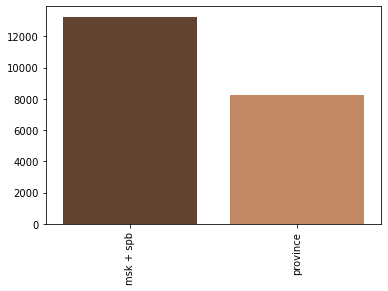

In [137]:
sns.barplot(city_count.index, city_count.values, palette='copper') # рисуем график, выбираем цвет
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение

In [138]:
import pandas as pd
df = pd.read_csv("united_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

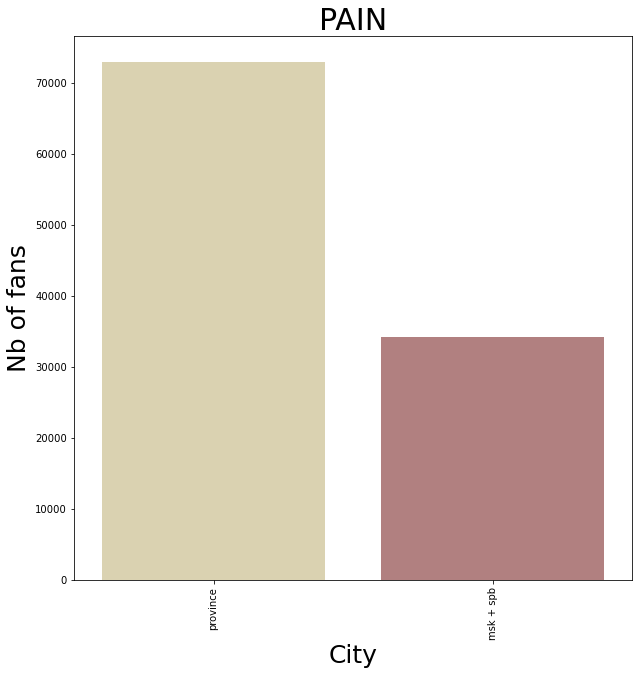

In [139]:
df.loc[(df['city'] == 'Moscow')] = "msk + spb"
df.loc[(df['city'] == 'Saint Petersburg')] = "msk + spb"
df.loc[(df['city'] != "msk + spb") & (df['city'] != "-")] = "province"


city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
plt.figure(figsize=(10,10)) #размер картинки
ax = sns.barplot(city_count.index,city_count.values, palette='pink_r') # рисуем график, выбираем цвет
plt.title('PAIN', fontsize=30)
plt.ylabel('Nb of fans', fontsize=25)
plt.xlabel('City', fontsize=25)
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение# your code here
